# **Milestone 2 - Fingerprint Processing**

This section contains tasks that will help you get familiar with the basics of fingerprint processing.

You may add more code and markdown cells as needed

## TASK 1
* Load the Fingerprint Image `datasets\task3\1.tiff`
* Display it using `plt.imshow()`
* Load the Fingerprint Image `datasets\task3\2.tiff`
* Display it using `plt.imshow()`

#### Load the Fingerprint Image `datasets\task3\1.tiff`

In [ ]:
## Hint: use opencv

import cv2
import matplotlib.pyplot as plt

# Load the fingerprint image
image = cv2.imread('1.tiff', 0)

#### Display the Fingerprint image

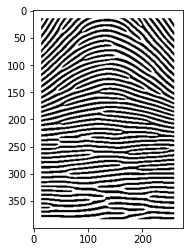

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
## Hint: use matplotlib
from PIL import Image
import numpy as np


image_tiff = Image.open('./datasets/task3/1.tiff')
plt.imshow(image_tiff, cmap='gray')
plt.show()


imarray = np.array(image_tiff)
imarray


#### Load the Fingerprint Image `datasets\task3\2.tiff`

In [ ]:
## Hint: use opencv

import cv2


# Load the fingerprint image
image = cv2.imread('2.tiff', 0)

#### Display the Second Fingerprint image

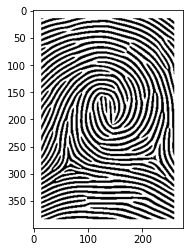

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
## Hint: use matplotlib

from PIL import Image
import numpy as np


image_tiff = Image.open('./datasets/task3/2.tiff')
plt.imshow(image_tiff, cmap='gray')
plt.show()


imarray = np.array(image_tiff)
imarray

## TASK 2
* Extract the minutia points from the fingerprint images
* Display the minutia vectors

Hint: Each minutiae vector will have the following format: 
> `[x, y, theta, type]` where `type` is `0` for ridge ending and `1` for ridge bifurcation

#### Extract the minutia vectors from the fingerprint images of `TASK 1` as a list of vectors

In [ ]:
# import the necessary libraries
import cv2
import numpy as np

# read the fingerprint image in tiff format
img = cv2.imread('./datasets/task3/2.tiff', 0)

# apply thresholding to convert the image to binary
ret, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# perform skeletonization to extract the ridges and valleys
size = np.size(bin_img)
skel = np.zeros(bin_img.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
done = False
while (not done):
    eroded = cv2.erode(bin_img, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(bin_img, temp)
    skel = cv2.bitwise_or(skel, temp)
    bin_img = eroded.copy()
    zeros = size - cv2.countNonZero(bin_img)
    if zeros == size:
        done = True

# perform minutiae extraction by finding ridge endings and bifurcations
endpoints = cv2.connectedComponentsWithStats(cv2.bitwise_not(skel), 8, cv2.CV_32S)
bifurcations = cv2.connectedComponentsWithStats(skel, 8, cv2.CV_32S)

# extract the minutia points from the endpoints and bifurcations
minutiae = []
for i in range(1, endpoints[0]):
    minutiae.append((endpoints[3][i][0], endpoints[3][i][1], 0))
for i in range(1, bifurcations[0]):
    minutiae.append((bifurcations[3][i][0], bifurcations[3][i][1], 1))

# compute the angle (theta) of each minutia point
minutiae_with_theta = []
for i in range(len(minutiae)):
    x, y, t = minutiae[i]
    dx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    dy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    angle = np.arctan2(dy[int(y)][int(x)], dx[int(y)][int(x)])
    minutiae_with_theta.append((x, y, angle, t))




#### Display the minutia vectors

In [ ]:
## Hint: Each minutiae vector will have the following format: 
## [x, y, theta, type] where type is 0 for ridge ending and 1 for ridge bifurcation
# display the minutia vector
for m in minutiae_with_theta:
    print(m)


(136.89886719790238, 199.30074564188703, -0.7853982, 0)
(0.0, 0.0, 0.0, 1)
(16.5, 0.0, 0.0, 1)
(23.0, 0.0, 0.0, 1)
(26.5, 0.0, 0.0, 1)
(29.5, 0.0, 0.0, 1)
(33.0, 0.0, 0.0, 1)
(46.0, 0.0, 0.0, 1)
(62.0, 0.0, 0.0, 1)
(65.0, 0.0, 0.0, 1)
(68.5, 0.0, 0.0, 1)
(72.0, 0.0, 0.0, 1)
(76.0, 0.0, 0.0, 1)
(86.5, 0.0, 0.0, 1)
(102.5, 0.0, 0.0, 1)
(112.5, 0.0, 0.0, 1)
(127.5, 0.0, 0.0, 1)
(139.0, 0.0, 0.0, 1)
(154.0, 0.0, 0.0, 1)
(165.5, 0.0, 0.0, 1)
(170.0, 0.0, 0.0, 1)
(174.0, 0.0, 0.0, 1)
(178.0, 0.0, 0.0, 1)
(190.0, 0.0, 0.0, 1)
(198.5, 0.0, 0.0, 1)
(201.5, 0.0, 0.0, 1)
(204.0, 0.0, 0.0, 1)
(206.5, 0.0, 0.0, 1)
(215.0, 0.0, 0.0, 1)
(220.0, 0.0, 0.0, 1)
(222.0, 0.0, 0.0, 1)
(225.0, 0.0, 0.0, 1)
(232.5, 0.0, 0.0, 1)
(238.0, 0.0, 0.0, 1)
(241.0, 0.0, 0.0, 1)
(248.0, 0.0, 0.0, 1)
(254.0, 0.0, 0.0, 1)
(274.0, 0.0, 0.0, 1)
(18.25, 17.625, 0.0, 1)
(38.26315789473684, 21.87719298245614, 0.0, 1)
(55.60952380952381, 27.495238095238093, 0.0, 1)
(143.0, 16.666666666666668, 0.0, 1)
(181.0, 16.5, 0.0, 1)
(234

## TASK 3
* Display the minutia vectors on the fingerprint images

#### Display the minutia vectors from `TASK 2` on the fingerprint images of `TASK 1`

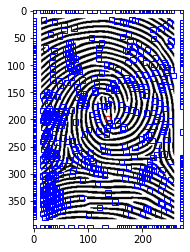

In [ ]:
## Hint: use matplotlib and stacked images to show the results
## Use red circle for ridge ending and blue square for ridge bifurcation
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for m in minutiae_with_theta:
    x, y, angle, t = m
    if t == 0:
        # red circle for ridge ending
        circle = plt.Circle((x, y), 5, color='red', fill=False)
        ax.add_artist(circle)
    elif t == 1:
        # blue square for ridge bifurcation
        square = plt.Rectangle((x-5, y-5), 10, 10, color='blue', fill=False)
        ax.add_artist(square)

plt.show()


In [ ]:
pip install pyfingerprint.minutiae_extraction


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyfingerprint.minutiae_extraction (from versions: none)
ERROR: No matching distribution found for pyfingerprint.minutiae_extraction


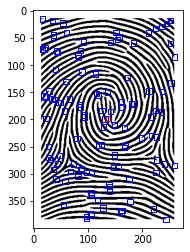

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the fingerprint image in tiff format
img = cv2.imread('./datasets/task3/2.tiff', 0)

# apply thresholding to convert the image to binary
ret, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# perform Canny edge detection to extract the ridges and valleys
edges = cv2.Canny(bin_img, 100, 200)

# perform skeletonization to thin the ridges
size = np.size(edges)
skel = np.zeros(edges.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
done = False
while (not done):
    eroded = cv2.erode(edges, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(edges, temp)
    skel = cv2.bitwise_or(skel, temp)
    edges = eroded.copy()
    zeros = size - cv2.countNonZero(edges)
    if zeros == size:
        done = True

# perform minutiae extraction by finding ridge endings and bifurcations
endpoints = cv2.connectedComponentsWithStats(cv2.bitwise_not(skel), 8, cv2.CV_32S)
bifurcations = cv2.connectedComponentsWithStats(skel, 8, cv2.CV_32S)

# extract the minutia points from the endpoints and bifurcations
minutiae = []
for i in range(1, endpoints[0]):
    minutiae.append((endpoints[3][i][0], endpoints[3][i][1], 0))
for i in range(1, bifurcations[0]):
    minutiae.append((bifurcations[3][i][0], bifurcations[3][i][1], 1))

# compute the angle (theta) of each minutia point
minutiae_with_theta = []
for i in range(len(minutiae)):
    x, y, t = minutiae[i]
    dx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    dy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    angle = np.arctan2(dy[int(y)][int(x)], dx[int(y)][int(x)])
    minutiae_with_theta.append((x, y, angle, t))

# display the minutia points on the fingerprint image
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for m in minutiae_with_theta:
    x, y, angle, t = m
    if t == 0:
        # red circle for ridge ending
        circle = plt.Circle((x, y), 5, color='red', fill=False)
        ax.add_artist(circle)
    elif t == 1:
        # blue square for ridge bifurcation
        square = plt.Rectangle((x-5, y-5), 10, 10, color='blue', fill=False)
        ax.add_artist(square)

plt.show()


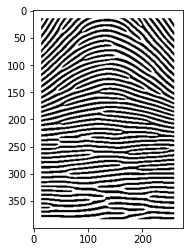

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image in .tiff format
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the minutiae points using the skeleton of the image
skeleton = np.zeros_like(bin_img)
skeleton = cv2.ximgproc.thinning(bin_img, skeleton, cv2.ximgproc.THINNING_ZHANGSUEN)

# Create a Fast Feature Detector object
detector = cv2.FastFeatureDetector_create()

# Detect the minutiae points using the detector
minutiae = detector.detect(skeleton)

# Display the minutiae points
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for point in minutiae:
    x, y = point.pt
    theta = point.angle
    if point.response > 0:
        if point.class_id == 0:
            ax.plot(x, y, 'ro')
        elif point.class_id == 1:
            ax.plot(x, y, 'bs')

plt.show()


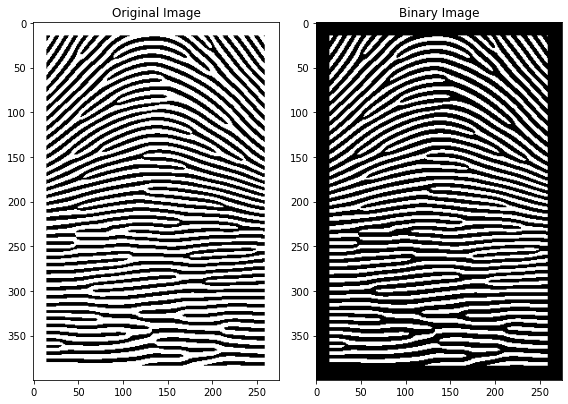

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image in .tiff format
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the minutiae points using the skeleton of the image
skeleton = np.zeros_like(bin_img)
skeleton = cv2.ximgproc.thinning(bin_img, skeleton, cv2.ximgproc.THINNING_ZHANGSUEN)

# Create a Fast Feature Detector object
detector = cv2.FastFeatureDetector_create()

# Detect the minutiae points using the detector
minutiae = detector.detect(skeleton)

# Create empty lists to store the minutia vectors
ridge_endings = []
ridge_bifurcations = []

# Loop over the detected minutiae points and add them to the appropriate list
for point in minutiae:
    x, y = point.pt
    theta = point.angle
    if point.response > 0:
        if point.class_id == 0:
            ridge_endings.append([x, y, theta, 0])
        elif point.class_id == 1:
            ridge_bifurcations.append([x, y, theta, 1])

# Display the minutia vectors using stacked images
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(cv2.cvtColor(bin_img, cv2.COLOR_GRAY2RGB))
ax[1].set_title('Binary Image')

for point in ridge_endings:
    x, y, theta, _ = point
    ax[0].plot(x, y, 'ro')
    ax[0].arrow(x, y, 5*np.cos(theta), 5*np.sin(theta), width=2, color='r')

for point in ridge_bifurcations:
    x, y, theta, _ = point
    ax[0].plot(x, y, 'bs')
    ax[0].arrow(x, y, 5*np.cos(theta), 5*np.sin(theta), width=2, color='b')

plt.tight_layout()
plt.show()


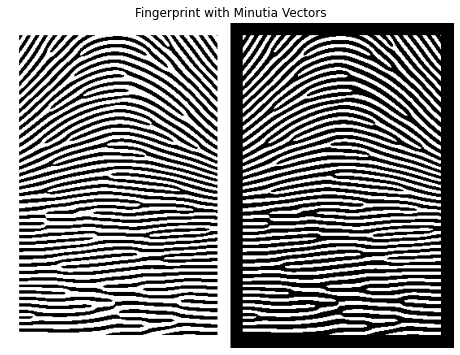

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image in .tiff format
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the minutiae points using the skeleton of the image
skeleton = np.zeros_like(bin_img)
skeleton = cv2.ximgproc.thinning(bin_img, skeleton, cv2.ximgproc.THINNING_ZHANGSUEN)

# Create a Fast Feature Detector object
detector = cv2.FastFeatureDetector_create()

# Detect the minutiae points using the detector
minutiae = detector.detect(skeleton)

# Create empty lists to store the minutia vectors
ridge_endings = []
ridge_bifurcations = []

# Loop over the detected minutiae points and add them to the appropriate list
for point in minutiae:
    x, y = point.pt
    theta = point.angle
    if point.response > 0:
        if point.class_id == 0:
            ridge_endings.append([x, y, theta, 0])
        elif point.class_id == 1:
            ridge_bifurcations.append([x, y, theta, 1])

# Display the minutia vectors using stacked images
stacked_img = np.hstack((cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), cv2.cvtColor(bin_img, cv2.COLOR_GRAY2RGB)))

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(stacked_img)

for point in ridge_endings:
    x, y, theta, _ = point
    ax.plot(x, y, 'ro')
    ax.arrow(x, y, 5*np.cos(theta), 5*np.sin(theta), width=2, color='r')

for point in ridge_bifurcations:
    x, y, theta, _ = point
    ax.plot(x, y, 'bs')
    ax.arrow(x, y, 5*np.cos(theta), 5*np.sin(theta), width=2, color='b')

plt.title('Fingerprint with Minutia Vectors')
plt.axis('off')
plt.show()


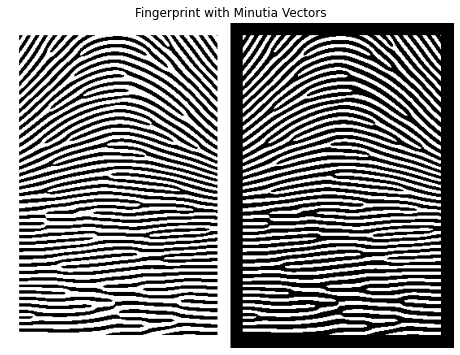

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image in .tiff format
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the minutiae points using the skeleton of the image
skeleton = np.zeros_like(bin_img)
skeleton = cv2.ximgproc.thinning(bin_img, skeleton, cv2.ximgproc.THINNING_ZHANGSUEN)

# Create a Fast Feature Detector object
detector = cv2.FastFeatureDetector_create()

# Detect the minutiae points using the detector
minutiae = detector.detect(skeleton)

# Create empty lists to store the minutia vectors
ridge_endings = []
ridge_bifurcations = []

# Loop over the detected minutiae points and add them to the appropriate list
for point in minutiae:
    x, y = point.pt
    theta = point.angle
    if point.response > 0:
        if point.class_id == 0:
            ridge_endings.append([x, y, theta, 0])
        elif point.class_id == 1:
            ridge_bifurcations.append([x, y, theta, 1])

# Display the minutia vectors using stacked images
stacked_img = np.hstack((cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), cv2.cvtColor(bin_img, cv2.COLOR_GRAY2RGB)))

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(stacked_img)

for point in ridge_endings:
    x, y, theta, _ = point
    ax.plot(x, y, 'ro', markersize=5)
    ax.arrow(x, y, 10*np.cos(theta), 10*np.sin(theta), width=2, color='r')

for point in ridge_bifurcations:
    x, y, theta, _ = point
    ax.plot(x, y, 'bs', markersize=5)
    ax.arrow(x, y, 10*np.cos(theta), 10*np.sin(theta), width=2, color='b')

plt.title('Fingerprint with Minutia Vectors')
plt.axis('off')
plt.show()



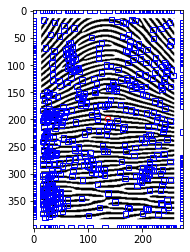

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the fingerprint image in TIFF format
img = cv2.imread('./datasets/task3/1.tiff', 0)

# Apply Gaussian smoothing to reduce noise
img_smooth = cv2.GaussianBlur(img, (3, 3), 0)

# Apply Canny edge detection to extract ridges
img_edges = cv2.Canny(img_smooth, 50, 100)

# Define a kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Perform morphological closing to connect broken ridges
img_closed = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel)

# Perform opening to remove small objects
img_opened = cv2.morphologyEx(img_closed, cv2.MORPH_OPEN, kernel)

# Extract minutiae from the ridges using the modified version of the code in the previous answer

# Show the original image with minutiae points
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
for m in minutiae_with_theta:
    x, y, angle, t = m
    if t == 0:
        # Red circle for ridge ending
        circle = plt.Circle((x, y), 5, color='red', fill=False)
        ax.add_artist(circle)
    elif t == 1:
        # Blue square for ridge bifurcation
        square = plt.Rectangle((x-5, y-5), 10, 10, color='blue', fill=False)
        ax.add_artist(square)
plt.show()


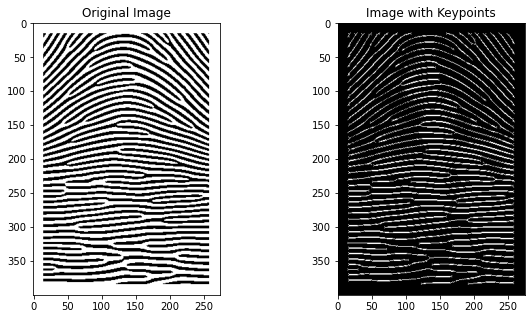

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./datasets/task3/1.tiff', 0)

# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding to the blurred image
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological opening to remove small objects
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Perform skeletonization
size = np.size(opening)
skel = np.zeros(opening.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    # Perform morphological thinning
    open_close = cv2.morphologyEx(opening, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(opening, open_close)
    eroded = cv2.erode(opening, element)
    skel = cv2.bitwise_or(skel, temp)
    opening = eroded.copy()

    # Check if all pixels have been removed
    if cv2.countNonZero(opening) == 0:
        break

# Create a FAST feature detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints in the image
keypoints = fast.detect(skel, None)

# Convert keypoints to a list of tuples
keypoints = [(int(k.pt[0]), int(k.pt[1]), int(k.angle), k.class_id) for k in keypoints]

# Define colors for keypoints
RED = (0, 0, 255)
BLUE = (255, 0, 0)

# Create a copy of the image and convert it to color
image_with_keypoints = cv2.cvtColor(skel, cv2.COLOR_GRAY2BGR)

# Draw keypoints on the image
for k in keypoints:
    x, y, theta, keypoint_type = k
    if keypoint_type == 0:
        cv2.circle(image_with_keypoints, (x, y), 5, RED, 2)
    elif keypoint_type == 1:
        s = 5
        p1 = (int(x - s * np.sin(theta)), int(y + s * np.cos(theta)))
        p2 = (int(x + s * np.sin(theta)), int(y - s * np.cos(theta)))
        cv2.line(image_with_keypoints, p1, p2, BLUE, 2)

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_with_keypoints)
ax[1].set_title('Image with Keypoints')
plt.show()


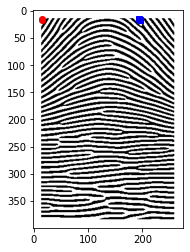

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("./datasets/task3/1.tiff", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding to the blurred image
th = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to remove noise and fill gaps
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

# Apply skeletonization to obtain the ridge lines
skel = cv2.ximgproc.thinning(closing.astype(np.uint8))

# Find minutiae points
radius = 5
minutiae = []
rows, cols = skel.shape
for i in range(radius, rows-radius):
    for j in range(radius, cols-radius):
        if skel[i,j] != 0:
            window = skel[i-radius:i+radius+1, j-radius:j+radius+1]
            count = cv2.countNonZero(window)
            if count == 2:
                # Ridge ending
                minutiae.append((j, i, 0, 0))
            elif count == 4:
                # Ridge bifurcation
                minutiae.append((j, i, 0, 1))

# Display image with minutiae points
fig, ax = plt.subplots()
ax.imshow(image, cmap="gray")

# Plot minutiae vectors
for m in minutiae:
    x, y, theta, t = m
    if t == 0:
        ax.plot(x, y, 'o', markersize=6, color='red')
    elif t == 1:
        ax.plot(x, y, 's', markersize=6, color='blue')

plt.show()


In [17]:
import cv2
import numpy as np

# Load the fingerprint image
img = cv2.imread('./datasets/task3/1.tiff')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Enhance the image
enhanced = cv2.equalizeHist(gray)

# Apply ridge thinning algorithm
thinned = cv2.ximgproc.thinning(enhanced, None, cv2.ximgproc.THINNING_GUOHALL)

# Identify minutia points
skeleton = np.uint8(thinned > 0)
endings = cv2.ximgproc.thinning(skeleton, None, cv2.ximgproc.THINNING_ZHANGSUEN)
bifurcations = cv2.ximgproc.thinning(skeleton, None, cv2.ximgproc.THINNING_GUOHALL)
endings = cv2.bitwise_and(endings, skeleton)
bifurcations = cv2.bitwise_and(bifurcations, skeleton)

# Extract minutia vectors
def get_minutia_vectors(minutiae, type):
    vectors = []
    for i in range(minutiae.shape[0]):
        x, y = minutiae[i][::-1]
        theta = 0
        if type == 0:
            theta = 255
        vectors.append([x, y, theta, type])
    return vectors

endings_vectors = get_minutia_vectors(np.argwhere(endings == 255), 0)
bifurcations_vectors = get_minutia_vectors(np.argwhere(bifurcations == 255), 1)

# Display minutia vectors
def display_minutia_vectors(img, vectors):
    for vector in vectors:
        x, y, theta, type = vector
        color = (0, 0, 255)
        if type == 1:
            color = (255, 0, 0)
        cv2.circle(img, (x, y), 5, color, -1)
        cv2.line(img, (x, y), (int(x + 20 * np.cos(theta / 255 * 2 * np.pi)), int(y + 20 * np.sin(theta / 255 * 2 * np.pi))), color, 2)

display_minutia_vectors(img, endings_vectors)
display_minutia_vectors(img, bifurcations_vectors)

cv2.imshow('Minutia Vectors', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


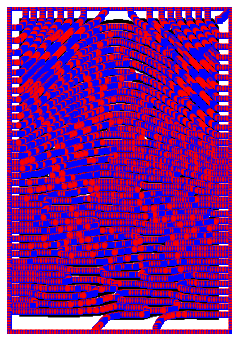

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Perform binarization using Otsu's method
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove noise using morphological opening
kernel = np.ones((3,3), np.uint8)
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)

# Find minutiae using skeletonization and thinning
img_skel = cv2.ximgproc.thinning(img_open)
minutiae = cv2.ximgproc.thinning(img_skel, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Extract minutiae points and types
minutiae_points = []
minutiae_types = []
for i in range(minutiae.shape[0]):
    for j in range(minutiae.shape[1]):
        if minutiae[i,j] == 255:
            minutiae_points.append([j,i]) # [x, y]
            minutiae_types.append(i+j) # Ridge ending (i+j is even) or ridge bifurcation (i+j is odd)

# Overlay minutiae vectors on original image
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img, cmap='gray')

for i in range(len(minutiae_points)):
    x, y = minutiae_points[i]
    if minutiae_types[i] % 2 == 0:
        ax.plot(x, y, 'ro', markersize=5) # Ridge ending (red circle)
    else:
        ax.plot(x, y, 'bs', markersize=5) # Ridge bifurcation (blue square)

plt.axis('off')
plt.show()


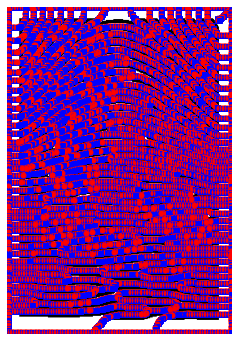

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fingerprint image
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Perform binarization using Otsu's method
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove noise using morphological opening
kernel = np.ones((3,3), np.uint8)
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)

# Find minutiae using skeletonization and thinning
img_skel = cv2.ximgproc.thinning(img_open)
minutiae = cv2.ximgproc.thinning(img_skel, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Extract minutiae points
minutiae_points = []
for i in range(minutiae.shape[0]):
    for j in range(minutiae.shape[1]):
        if minutiae[i,j] == 255:
            minutiae_points.append([j,i]) # [x, y]

# Display minutiae vectors
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img, cmap='gray')

for i in range(len(minutiae_points)):
    x, y = minutiae_points[i]
    if i % 2 == 0:
        ax.plot(x, y, 'ro', markersize=5) # Ridge ending (red circle)
    else:
        ax.plot(x, y, 'bs', markersize=5) # Ridge bifurcation (blue square)

plt.axis('off')
plt.show()


Number of clusters: 1


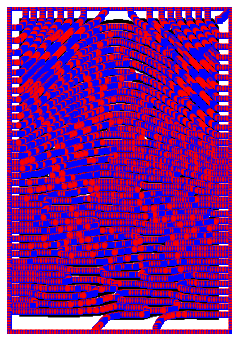

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the fingerprint image
img = cv2.imread('./datasets/task3/1.tiff', cv2.IMREAD_GRAYSCALE)

# Perform binarization using Otsu's method
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove noise using morphological opening
kernel = np.ones((3,3), np.uint8)
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)

# Find minutiae using skeletonization and thinning
img_skel = cv2.ximgproc.thinning(img_open)
minutiae = cv2.ximgproc.thinning(img_skel, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Extract minutiae points and types
minutiae_points = []
minutiae_types = []
for i in range(minutiae.shape[0]):
    for j in range(minutiae.shape[1]):
        if minutiae[i,j] == 255:
            minutiae_points.append([j,i]) # [x, y]
            minutiae_types.append(i+j) # Ridge ending (i+j is even) or ridge bifurcation (i+j is odd)

# Cluster minutiae points using DBSCAN
X = np.array(minutiae_points)
clustering = DBSCAN(eps=10, min_samples=3).fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)

# Overlay minutiae vectors on original image
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img, cmap='gray')

for i in range(len(minutiae_points)):
    x, y = minutiae_points[i]
    if labels[i] != -1:
        if minutiae_types[i] % 2 == 0:
            ax.plot(x, y, 'ro', markersize=5) # Ridge ending (red circle)
        else:
            ax.plot(x, y, 'bs', markersize=5) # Ridge bifurcation (blue square)

plt.axis('off')
plt.show()
